In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], x_Train.shape[1], x_Train.shape[2], 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], x_Test.shape[1], x_Test.shape[2], 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_Train)
y_Test_OneHot = np_utils.to_categorical(y_Test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

W0708 14:54:30.174130  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



<hr>
建立捲積層<br>
filters = 16: 建立16個濾鏡filter weight<br>
kernel_size = (5, 5): 每個濾鏡大小5*5<br>
padding = 'same': 設定捲積運算後, 產生的捲積影像大小不變<br>
input_shape = (x_Train.shape[1], x_Train.shape[2], 1): 第1,2維度代表輸入的影像大小, 第3個維度代表是單色灰階影像所以是1
<hr>

In [8]:
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (x_Train.shape[1], x_Train.shape[2], 1),
                 activation = 'relu'))

W0708 14:54:30.188093  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 14:54:30.189091  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



<hr>
建立池化層<br>
pool_size = (2, 2): 執行縮減取樣(downsampling), 將16個28*28影像, 縮小為16個14*14影像
<hr>

In [9]:
model.add(MaxPooling2D(pool_size = (2, 2)))

W0708 14:54:30.203031  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [10]:
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (x_Train.shape[1], x_Train.shape[2], 1),
                 activation = 'relu'))

In [11]:
model.add(MaxPooling2D(pool_size = (2, 2)))

<hr>
隨機在神經網路中放棄25%的神經元, 以避免overfitting
<hr>

In [12]:
model.add(Dropout(0.25))

W0708 14:54:30.261711  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 14:54:30.266698  1056 deprecation.py:506] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<hr>
建立平坦層<br>
將36個7*7影像, 以reshape轉換為1維的向量, 長度是36*7*7=1764, 也就是1764個float數字, 作為神經元的輸入
<hr>

In [13]:
model.add(Flatten())

<hr>
建立隱藏層
<hr>

In [15]:
model.add(Dense(128, activation = 'relu'))

In [16]:
model.add(Dropout(0.5))

<hr>
建立輸出層
<hr>

In [17]:
model.add(Dense(10, activation = 'softmax'))

<hr>
查看模型摘要
<hr>

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

<hr>
開始訓練
<hr>

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

W0708 15:00:21.794945  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 15:00:21.810888  1056 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [21]:
train_history = model.fit(x = x_Train4D_normalize, 
                          y = y_Train_OneHot, 
                          validation_split = 0.2, 
                          epochs = 10, batch_size = 300, verbose = 2)

W0708 15:01:39.594669  1056 deprecation.py:323] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.4898 - acc: 0.8473 - val_loss: 0.0973 - val_acc: 0.9721
Epoch 2/10
 - 11s - loss: 0.1411 - acc: 0.9582 - val_loss: 0.0634 - val_acc: 0.9808
Epoch 3/10
 - 11s - loss: 0.1024 - acc: 0.9690 - val_loss: 0.0524 - val_acc: 0.9838
Epoch 4/10
 - 11s - loss: 0.0837 - acc: 0.9760 - val_loss: 0.0459 - val_acc: 0.9853
Epoch 5/10
 - 11s - loss: 0.0718 - acc: 0.9781 - val_loss: 0.0395 - val_acc: 0.9873
Epoch 6/10
 - 11s - loss: 0.0641 - acc: 0.9807 - val_loss: 0.0391 - val_acc: 0.9880
Epoch 7/10
 - 11s - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 8/10
 - 11s - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 9/10
 - 11s - loss: 0.0454 - acc: 0.9865 - val_loss: 0.0344 - val_acc: 0.9900
Epoch 10/10
 - 11s - loss: 0.0423 - acc: 0.9870 - val_loss: 0.0345 - val_acc: 0.9905


In [22]:
import matplotlib.pyplot as plt
def show_train_histoy(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

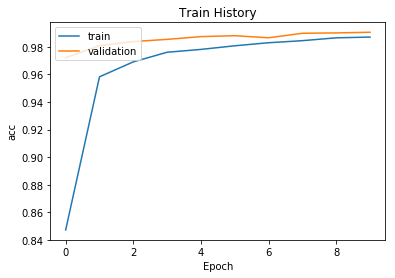

In [23]:
show_train_histoy(train_history, 'acc', 'val_acc')

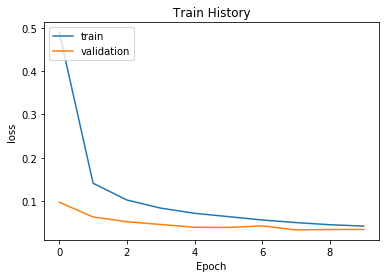

In [24]:
show_train_histoy(train_history, 'loss', 'val_loss')

In [25]:
scores = model.evaluate(x_Test4D_normalize, y_Test_OneHot)
scores[1]

10000/10000 [==============================] - 1s 67us/step


0.991

In [26]:
prediction = model.predict_classes(x_Test4D_normalize)

In [27]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [28]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label= ' + str(labels[idx])
        if len(prediction) > 0:
            title += ', predict= ' + str(prediction[idx])
            
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

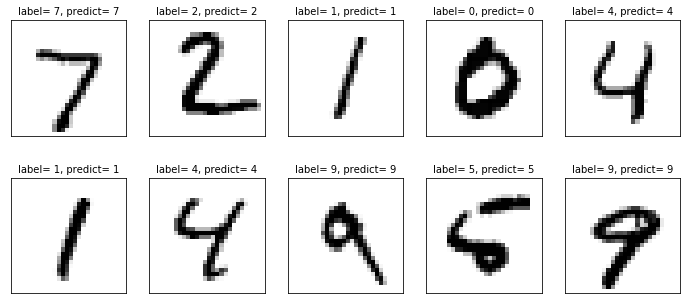

In [29]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

In [30]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,3,0,1025,0,1,0,0,3,0,0
3,0,0,0,1005,0,0,0,3,2,0
4,0,0,0,0,974,0,1,0,1,6
5,1,0,0,6,0,881,2,1,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,1,2,1,0,0,0,1021,1,2
8,4,0,3,2,1,0,0,2,958,4
